In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group # Used for random rotation of covariance matrix
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import sys
sys.path.insert(1,'../../src')
import utils.general_tools as gt
import utils.setConfig as sc
config = pd.read_csv(f'../../bucket/config/{sc.select_data_folder()}',index_col=0)

In [47]:
embeddings_without_ChatGPT_path=config.loc['embeddings_dataset_without_ChatGPT'][0]
X_emb= pd.read_csv(embeddings_without_ChatGPT_path,index_col=0).iloc[200:].reset_index(drop=True)
y = pd.read_csv(config.loc['inference_sep2023_model_without_chatGPT'][0],index_col=0).iloc[200:].reset_index(drop=True)
X_text=pd.read_csv(config.loc['data_postETL_and_featureEng'][0],index_col=0).iloc[200:].reset_index(drop=True)

In [48]:
# embeddings_without_ChatGPT_path=config.loc['embeddings_dataset_without_ChatGPT'][0]
# X_emb= pd.read_csv(embeddings_without_ChatGPT_path,index_col=0).iloc[200:]
# y = pd.read_csv(config.loc['inference_sep2023_model_without_chatGPT'][0],index_col=0).iloc[200:]
# X_text=pd.read_csv(config.loc['data_postETL_and_featureEng'][0]).iloc[200:]
X=X_emb.iloc[list(y.query('label==1').index)]
X_text=X_text.iloc[list(y.query('label==1').index)]
y=y.query('label==1')

In [26]:
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X)

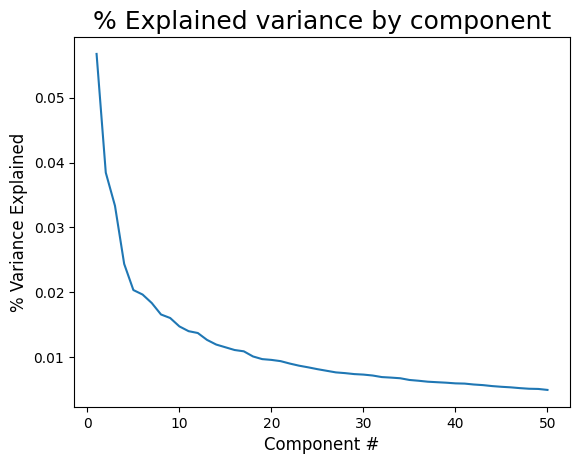

In [27]:
plt.plot(np.arange(1,51),pca.explained_variance_ratio_[0:50])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=12)
plt.ylabel("% Variance Explained",size=12)
plt.show()

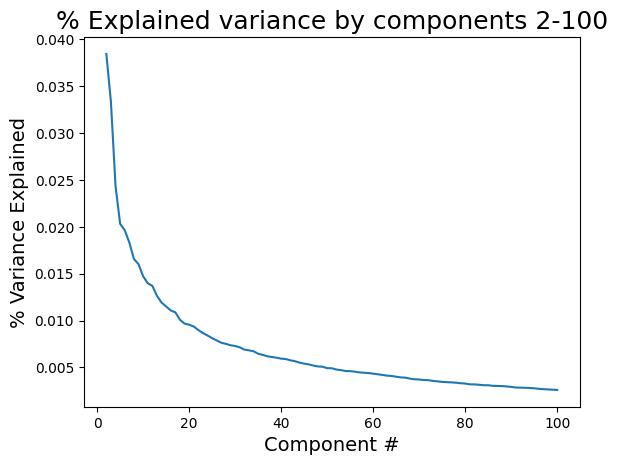

In [32]:
plt.plot(np.arange(2,101),pca.explained_variance_ratio_[1:100])
plt.title("% Explained variance by components 2-100",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

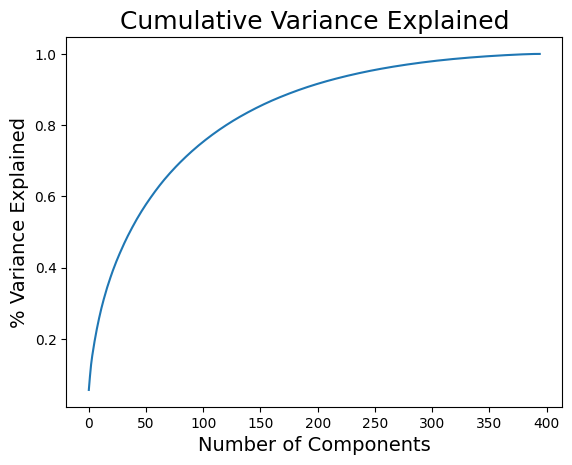

In [33]:
plt.plot(np.arange(0,X.shape[0]),np.cumsum(pca.explained_variance_ratio_[0:X.shape[0]]))
plt.title("Cumulative Variance Explained",size=18)
plt.xlabel("Number of Components",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

In [34]:
min_feat_past_threshold=np.where(np.cumsum(pca.explained_variance_ratio_) >=.99)[0][0]
print(min_feat_past_threshold)

334


/home/oneking/Documents/Github_Projects/twitter_pf_NLP/venv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


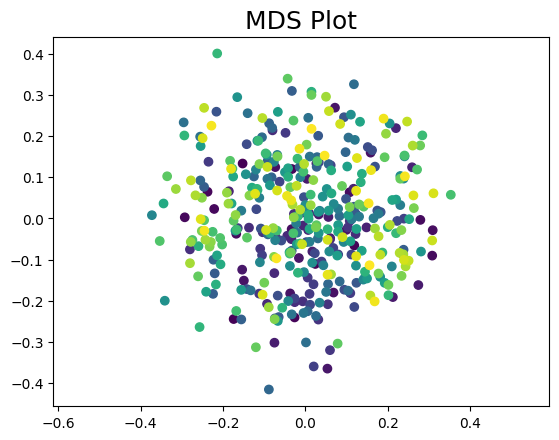

In [35]:
# MDS can be slow when n is large
mds = MDS(n_components=8,verbose=1,eps=1e-5)
mds.fit(X)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=np.arange(y.shape[0]))
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 395 samples in 0.001s...
[t-SNE] Computed neighbors for 395 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 395 / 395
[t-SNE] Mean sigma: 0.122002
[t-SNE] KL divergence after 100 iterations with early exaggeration: 70.161224
[t-SNE] KL divergence after 1000 iterations: 1.197899


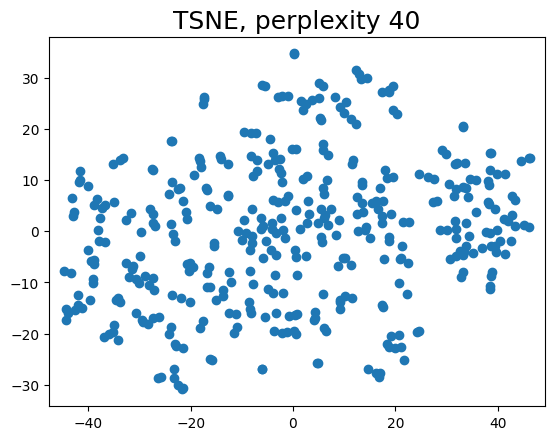

In [36]:
tsne = TSNE(n_components=2,verbose=1,perplexity=10, learning_rate=10)
z_tsne = tsne.fit_transform(X)
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 395 samples in 0.000s...
[t-SNE] Computed neighbors for 395 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 395 / 395
[t-SNE] Mean sigma: 0.151254
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.828335
[t-SNE] KL divergence after 1000 iterations: 1.014734


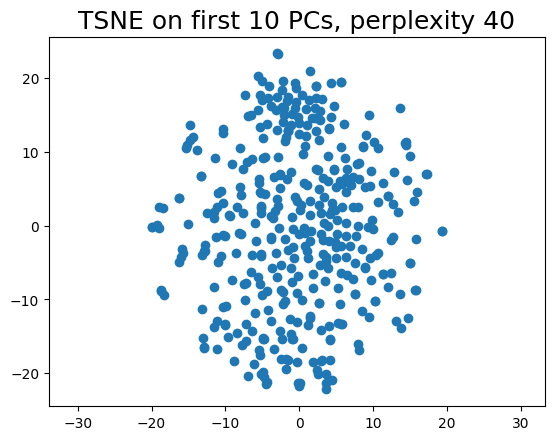

In [37]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(z[:,0:min_feat_past_threshold])
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE on first 10 PCs, perplexity 40",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 395 samples in 0.001s...
[t-SNE] Computed neighbors for 395 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 395 / 395
[t-SNE] Mean sigma: 0.137746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.721306
[t-SNE] KL divergence after 1000 iterations: 1.181838


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      label
0        1
2        1
5        1
8        1
10       1
..     ...
807      1
810      1
811      1
812      1
813      1

[395 rows x 1 columns]

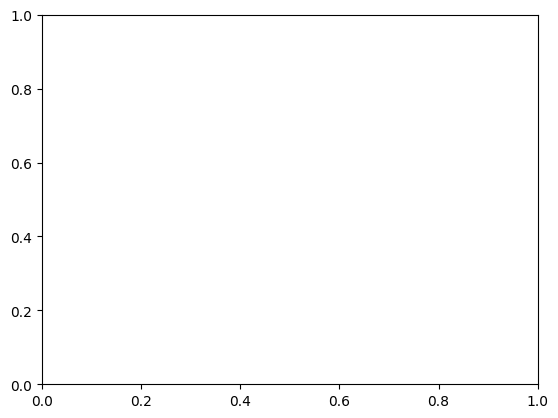

In [38]:
tsne = TSNE(n_components=2,verbose=1,perplexity=20)
z_tsne = tsne.fit_transform(z[:,0:min_feat_past_threshold])
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y)
plt.title("TSNE on first 10 PCs, perplexity 5",size=18)
plt.axis("equal")
plt.show()

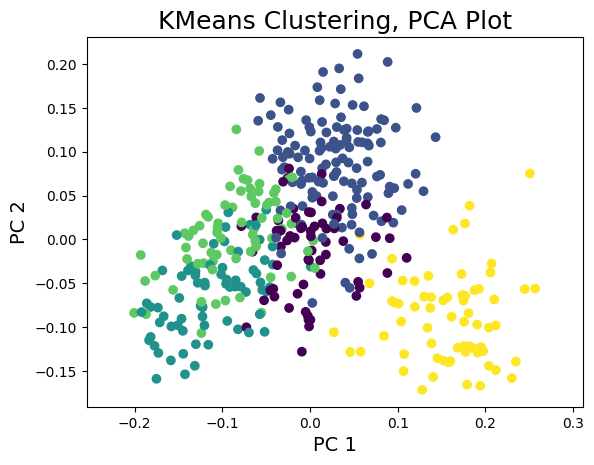

In [40]:
kmeans = KMeans(n_clusters=5,n_init=10)
y = kmeans.fit_predict(X)
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

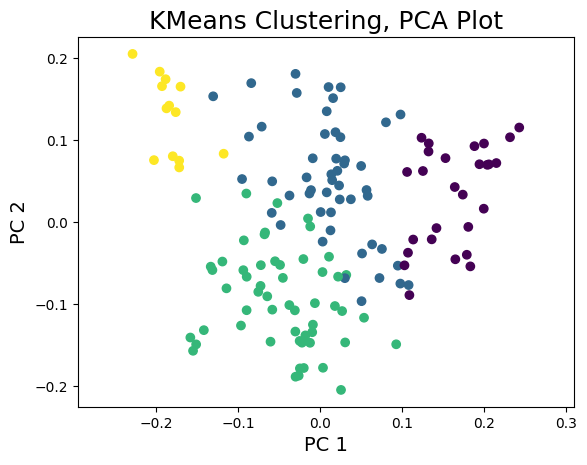

In [20]:
# More initializations
kmeans = KMeans(n_clusters=4,n_init=100)
y = kmeans.fit_predict(z)
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

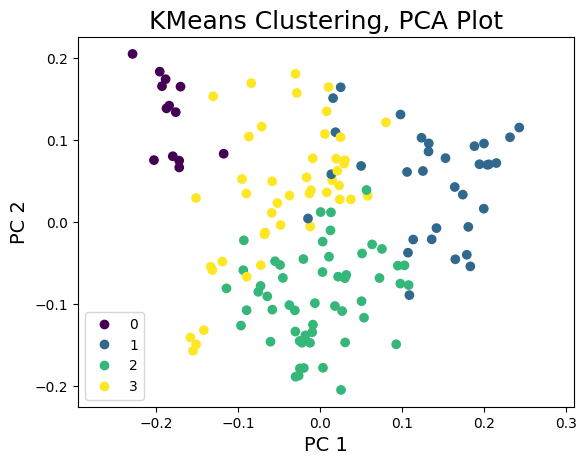

['iphone 15 models finally show batterys cycle count httpsmacrumorscom20230920iphone15showsbatterycyclecountutmsourcedlvritutmmediumtwitter...214601039k',
 'iphone 15 pro max is a great camera  smart hdr 5 not only rivals but also beats the s23 ultra in many situations image 1 this is a much needed updateiphones nextgen portraits truly are nextgen edge detection is on par and even exceeds the s23 ultra image 2... show more6310113342287k',
 'not a good start for iphone 15 pro 3817409569k',
 'final cut pro for mac is ready for the iphone 15 pro https9to5maccom20230919finalcutiphone15pro... by apollozac9to5maccomfinal cut pro for mac is ready for the iphone 15 pro  9to5macapple is releasing the iphone 15 pro on friday and with it comes new prograde video capture features ahead of3978278k']

In [24]:
# Reduced dimension
kmeans = KMeans(n_clusters=4,n_init=100)
y = kmeans.fit_predict(z[:,0:min_feat_past_threshold])
centers=kmeans.cluster_centers_
scatter=plt.scatter(z[:,0],z[:,1],c=y)
plt.legend(handles=scatter.legend_elements()[0],labels=set(y))
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()
ps_centroids=[]
for i,item in enumerate(centers.tolist()):
    # print(item)
    prev=float('infinity')
    min_j=0
    for j,post in enumerate(z[:,0:min_feat_past_threshold].tolist()):
        # print(item[:5],'|',post[:5])
        diff=np.sum((centers[i]-z[j,0:min_feat_past_threshold])**2)
        diff=min(diff,prev)
        if diff!=prev:
            min_j=j
        prev=diff
    ps_centroids.append(min_j)
X_text.iloc[ps_centroids].text.tolist()

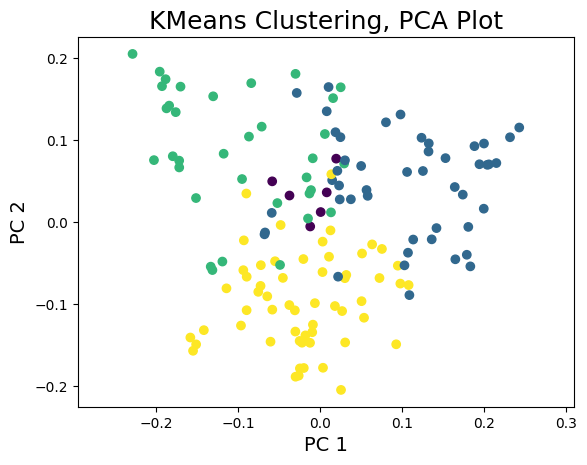

In [25]:
kmed = KMedoids(n_clusters=4,max_iter=1000,init='k-medoids++')
y = kmed.fit_predict(z[:,:])
centers=kmed.cluster_centers_
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

EM clustering is a more versatile clustering algorithm that can adapt to non-spherical clusters, which I think makes the most sense when dealing with something non-uniform such as natural language embeddings. 

read: https://www.linkedin.com/pulse/clustering-k-means-vs-em-basics-venki-manoharan/

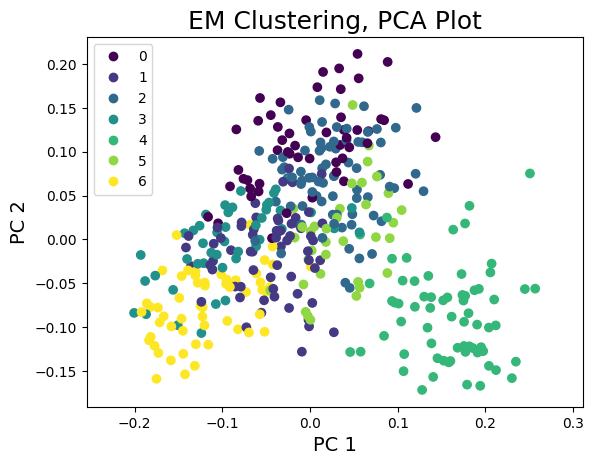

['google pixel 8 pro vs iphone 15 pro max3243854581k', 'the iphone 15 and iphone 15 pro have officially been released16837849105707k', 'apple advertised their iphone 15 pro max titanium build as from the edge of the universe to the palm of your hand and then this happens2418297174k', 'some of you are already using iphone 15 pro max ei where are you guys making your money abeg show me the way wai but if it is ugly road i will not pass mmom 82946820', 'iphone 15 pro series overheating issuesapples compromises in the thermal system design for a lighter weightlike reducing heat dissipation area  using a titanium frame1021369131k', 'iphone diary first impressions of the iphone 15 pro max https9to5maccom20230922firstimpressionsoftheiphone15promax... by benlovejoy9to5maccom21386266k', 'video apple fans queue up to buy iphone 15 alao abioduniphone15 iphone15promax01871552105k']


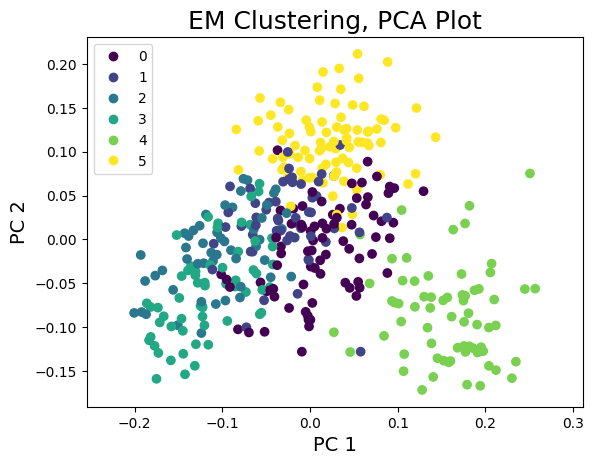

['iphone 15 pro users drop your best shot 49210116418575k', 'my friend iphone 15 pro is 1000 nintendo switch is 300 and has mario kart and tears of the kingdomit is you that will be moving overquotevadim yuryevvadimyuryevsep 26fun fact the iphone 15 pro is now a gaming console step aside nintendo here is my setup which includes passthrough charging power to the razer magsafe cooler to stop overheating and hdmi to my 150 4k projector all through one adapter full list of components below 712250158k', 'some of you are already using iphone 15 pro max ei where are you guys making your money abeg show me the way wai but if it is ugly road i will not pass mmom 82946820', 'lines at apple store bkc mumbai in  india thankfully they let the ones who have preordered the iphone 15 series device for pickup in immediately iphone15pro iphone15 iphone15promax1449495667k', 'iphone 15 pro series overheating issuesapples compromises in the thermal system design for a lighter weightlike reducing heat dissi

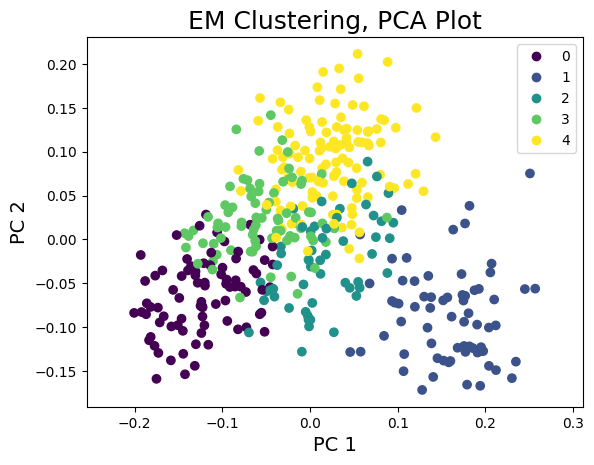

['video apple fans queue up to buy iphone 15 alao abioduniphone15 iphone15promax01871552105k', 'iphone 15 pro series overheating issuesapples compromises in the thermal system design for a lighter weightlike reducing heat dissipation area  using a titanium frame1021369131k', 'iphone 15 pro users drop your best shot 49210116418575k', 'i got all the new iphone 15 and iphone 15 pro maxhttpsyoutubekxoarc65no via youtubeindia43518619801567k', 'google pixel 8 pro vs iphone 15 pro max3243854581k']


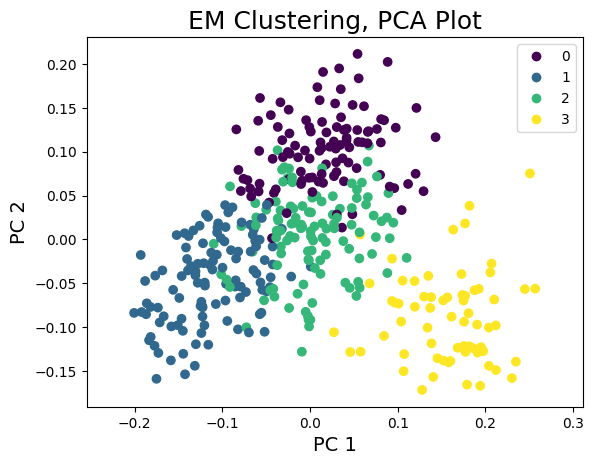

['google pixel 8 pro vs iphone 15 pro max3243854581k', 'the new iphone 15 has people going crazy...8737402665k', 'iphone 15 pro users drop your best shot 49210116418575k', 'iphone 15 pro series overheating issuesapples compromises in the thermal system design for a lighter weightlike reducing heat dissipation area  using a titanium frame1021369131k']


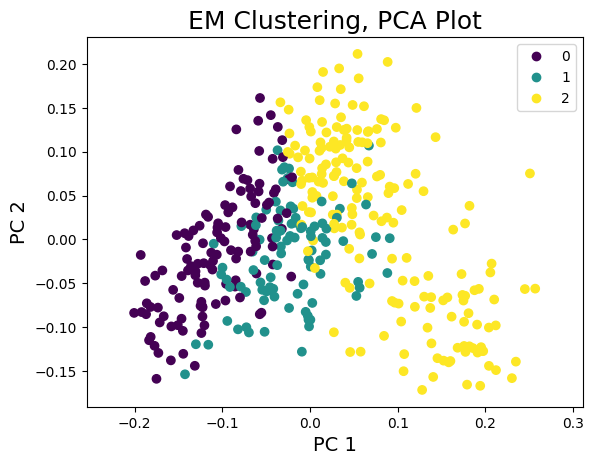

['i got all the new iphone 15 and iphone 15 pro maxhttpsyoutubekxoarc65no via youtubeindia43518619801567k', 'iphone 15 pro users drop your best shot 49210116418575k', 'i seem to be the only person enjoying the iphone 15 pro maxno heating upgreat battery lifeios 17 running very fluid with no hiccupsgifalt11215447346k']


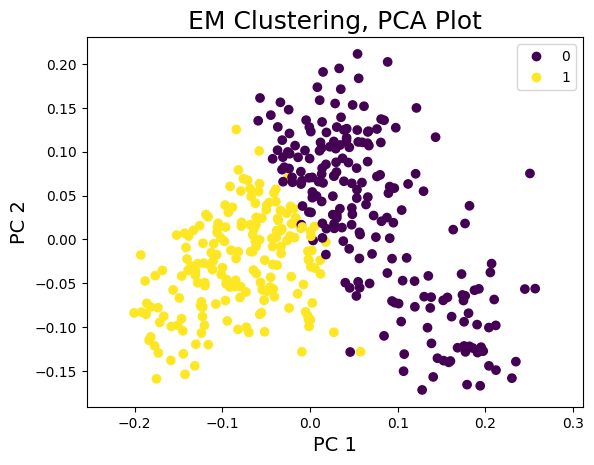

['iphone 15 pro max after 100 hours of usefull video httpyoutubeao9qtcwp3ksiqgzermgjaeqob9tt26...42116848k', 'iphone 15 pro users drop your best shot 49210116418575k']


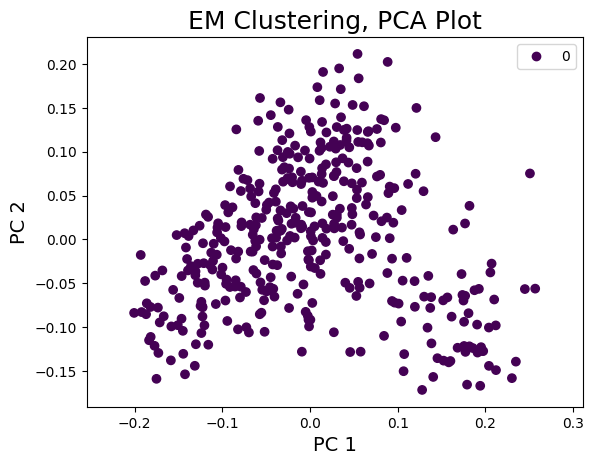

['iphone 15 pro users drop your best shot 49210116418575k']


In [65]:
master_dicts={}
for k in range(2,9):
    em=GaussianMixture(n_components=i, tol=0.000001,n_init=10)
    y = em.fit_predict(z[:,0:min_feat_past_threshold])
    centers=em.means_
    scatter=plt.scatter(z[:,0],z[:,1],c=y)
    plt.legend(handles=scatter.legend_elements()[0],labels=set(y))
    plt.title("EM Clustering, PCA Plot",size=18)
    plt.xlabel("PC 1",size=14)
    plt.ylabel("PC 2",size=14)
    plt.axis("equal")
    plt.show()
    ps_centroids=[]
    clusterSet_df=[]
    for i,item in enumerate(centers.tolist()):
        # print(item)
        prev=float('infinity')
        min_j=0
        j_sorted=[]
        for j,post in enumerate(z[:,0:min_feat_past_threshold].tolist()):
            # print(item[:5],'|',post[:5])
            diff=np.sum((centers[i]-z[j,0:min_feat_past_threshold])**2)
            j_sorted.append([diff,j,X_text.iloc[j].tolist()])
            diff=min(diff,prev)
            if diff!=prev:
                min_j=j
            prev=diff
        clusterSet_df.append(sorted(j_sorted,key=lambda x: x[0]))
        ps_centroids.append(min_j)
    master_dicts[f'{k}']=pd.DataFrame(clusterSet_df)
    print(X_text.iloc[ps_centroids].text.tolist())

In [66]:
master_dicts['4'].to_csv('../../bucket/iPhone15/inferences/test.csv')